#Students Adaptability Using Explainable AI in Educational


# Connect Google drive

In [379]:
# Importing necessary library for Google Drive integration
from google.colab import drive

# Mounting the cloud storage to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [380]:
!pip install shap
!pip install lime

In [381]:
#Alias for the module on numerical computing
import numpy as npy

#Alias development for the module on structured data manipulation
import pandas as pds

#Alias development for the module that plots charts
import matplotlib.pyplot as mpt

#Creation of the statistical data visualization module using Alias
import seaborn as sbs

#Alert message management module
import warnings

#Suppresses alert signals that are not urgent
warnings.filterwarnings('ignore')

#Category attribute transformation tool
from sklearn.preprocessing import LabelEncoder

#How to choose the best qualities using statistical tests
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#A tool for condensing numerical numbers into a specified range
from sklearn.preprocessing import MinMaxScaler

#Solution for problems with unbalanced labels
from imblearn.over_sampling import RandomOverSampler

#Tool for segmenting datasets for assessment and training
from sklearn.model_selection import train_test_split

#Tools for assessing the efficacy of categorization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#More learners and advanced forecasters
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier,ExtraTreesClassifier

#Margin-based classifier for input that is structured
from sklearn.svm import SVC

#Linear predictor with regularization and integrated validation
from sklearn.linear_model import LogisticRegressionCV

#Enhanced gradient-based learning methodology
from xgboost import XGBClassifier

#Efficient and quick tree-based gradient technique
from lightgbm import LGBMClassifier

#Tools for curv charting performance analysis
from sklearn.metrics import roc_curve, auc

#The process of transforming categories into numerical form
from sklearn.preprocessing import label_binarize

#Metrics to assess the quality of classifiers from various angles
from sklearn.metrics import f1_score, precision_score, recall_score

# Bringing in the SHAP library, which is used to describe machine learning model output
import shap

# Importing the base LYME package
import lime

# Importing the specific module for tabular data from LYME, useful for explaining models trained on structured datasets
import lime.lime_tabular


# Data Preprocessing

In [382]:
#Retrieves tabular data from cloud storage and organizes it in a useful format.
dfrm = pds.read_csv('/content/drive/MyDrive/students_adaptability_level_online_education.csv')

# Display the first few records
dfrm.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


# Check Data Information

In [383]:
#counts each column's missing values.
dfrm.isnull().sum()

,0
Gender,0
Age,0
Education Level,0
Institution Type,0
IT Student,0
Location,0
Load-shedding,0
Financial Condition,0
Internet Type,0
Network Type,0


# Check shape

In [384]:
# Shows a summary of the internal structure and attributes
dfrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


# Check Null Values

In [385]:
#counts each column's missing values.
dfrm.isnull().sum()

,0
Gender,0
Age,0
Education Level,0
Institution Type,0
IT Student,0
Location,0
Load-shedding,0
Financial Condition,0
Internet Type,0
Network Type,0


# Check columns

In [386]:
#Return an array with the names of the fields
dfrm.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

# check Duplicate

In [387]:
#Checks for replicated data points
dfrm.duplicated().sum()

np.int64(949)

In [388]:
#Dataset statistics such as count, mean, standard deviation, min, quartiles, and maximum are summarized.
dfrm.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [389]:
#Eliminate any columns with missing values.
dfrm = dfrm.dropna(axis=1, how='all')


# Data Visualization

##Distribution of Target Variable

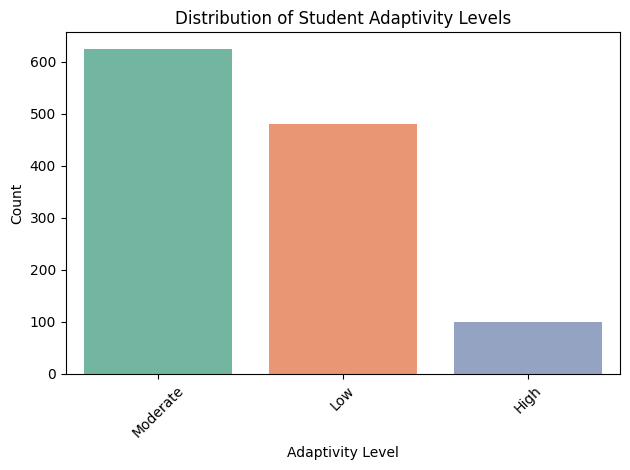

In [390]:
#Imports a function to create a count-based bar visualization
sbs.countplot(data=dfrm, x='Adaptivity Level', palette='Set2')

#Adds a descriptive heading to the visualization
mpt.title('Distribution of Student Adaptivity Levels')

#Labels the bottom axis of the visual
mpt.xlabel('Adaptivity Level')

#Labels the side axis to indicate quantity
mpt.ylabel('Count')

#Rotates the bottom labels slightly for better readability
mpt.xticks(rotation=45)

#Automatically adjusts layout to prevent overlap or cutoff
mpt.tight_layout()

#Renders the created visual on the screen
mpt.show()


# Distribution of Student Adaptivity Levels

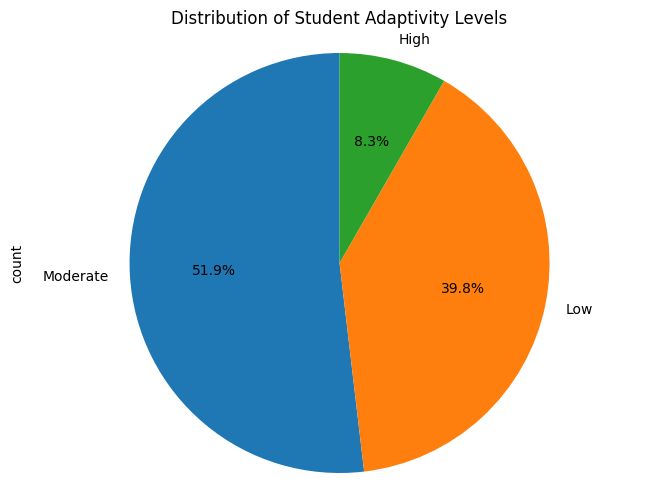

In [391]:
# Establish the plot canvas's dimensions.
mpt.figure(figsize=(8, 6))

dfrm['Adaptivity Level'] = dfrm['Adaptivity Level'].replace({0: 'Low', 1: 'Moderate', 2: 'High'})

# Create a pie chart with data grouped by 'Adaptivity Level'.
dfrm['Adaptivity Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

# Give the image a header.
mpt.title('Distribution of Student Adaptivity Levels')

# Ensure the pie chart is circular
mpt.axis('equal')

# Render the completed graphic result.
mpt.show()


## Gender distribution


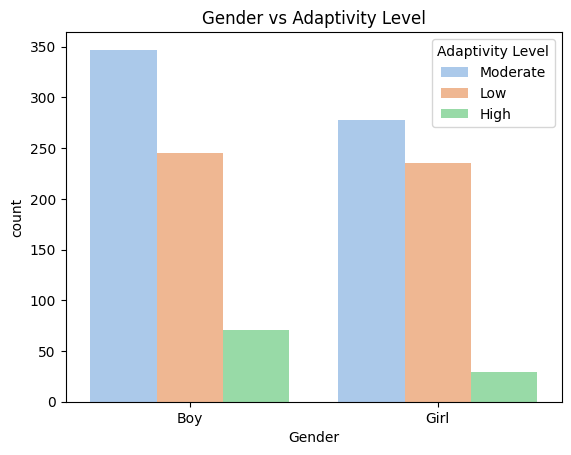

In [392]:
#Generates a bar graph  that displays each group's frequency broken down by another property.
sbs.countplot(data=dfrm, x='Gender', hue='Adaptivity Level', palette='pastel')

#Gives the visual aid a meaningful designation.
mpt.title('Gender vs Adaptivity Level')

# Shows the finished visual result.
mpt.show()


## Age Distribution

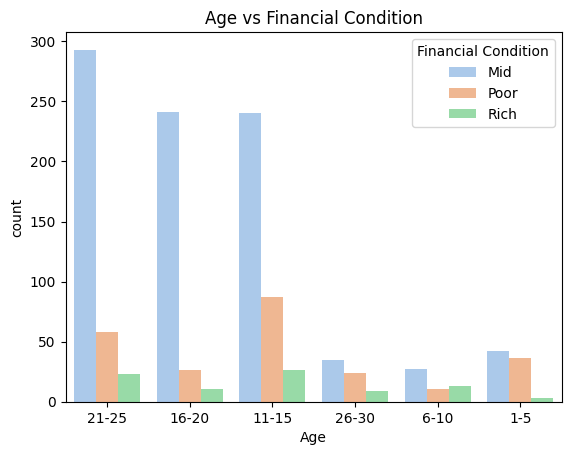

In [393]:
# Use 'Financial Condition' to visualize the frequency of each 'Age' category
sbs.countplot(data=dfrm, x='Age', hue='Financial Condition', palette='pastel')

# Set the title of the plot
mpt.title('Age vs Financial Condition')

# Establish the plot's title.
mpt.show()

#Internet Type vs Network Type

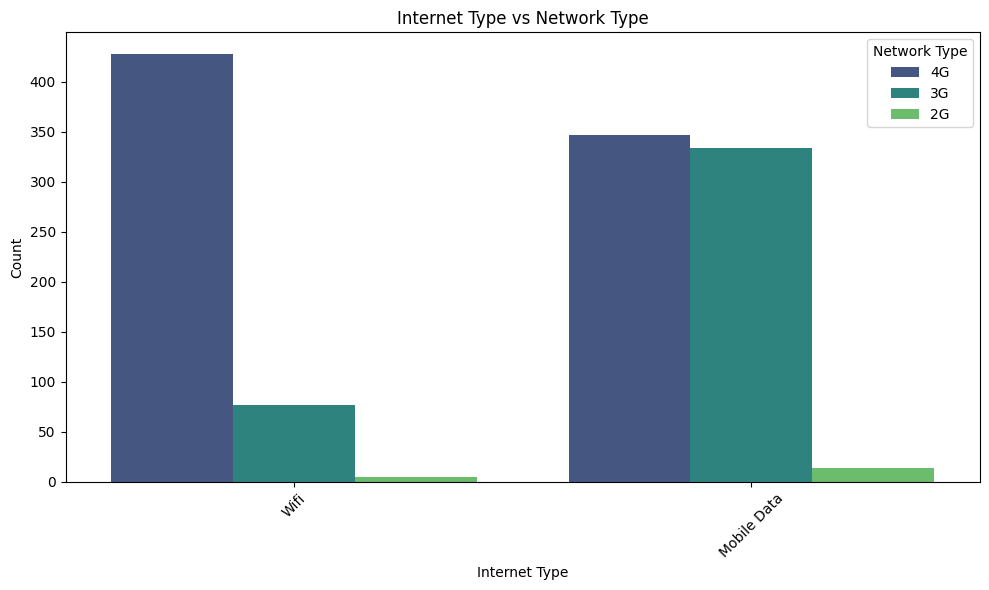

In [394]:
# Decide on 10x6 inches as the figure size.
mpt.figure(figsize=(10, 6))

# Use color grouping to plot count data according to network type.
sbs.countplot(data=dfrm, x='Internet Type', hue='Network Type', palette='viridis')

# Give the story a heading.
mpt.title('Internet Type vs Network Type')

# Indicate 'Internet Type' on the x-axis.
mpt.xlabel('Internet Type')

# Put 'Count' on the y-axis label.
mpt.ylabel('Count')

# To improve readability, rotate the x-axis labels by 45 degrees.
mpt.xticks(rotation=45)

# Modify the arrangement to best match the narrative.
mpt.tight_layout()

# Show the plot
mpt.show()


# Label encoding




In [395]:
#Build a data encoding converter instance
le = LabelEncoder()

#Run a loop across every dataset feature.
for col in dfrm.columns:

# Verify that the data type is not numeric.
    if dfrm[col].dtype == 'object':

#To convert to numerical format, use an encoder.
        dfrm[col] = le.fit_transform(dfrm[col])

#Show the first few records following the alteration.
print(dfrm.head())


   Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       0    3                2                 1           0         1   
1       1    3                2                 1           0         1   
2       1    2                0                 0           0         1   
3       1    1                1                 1           0         1   
4       1    2                1                 1           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              1                    0              1             2   
1              0                    0              0             2   
2              1                    0              1             2   
3              1                    0              0             2   
4              1                    1              0             1   

   Class Duration  Self Lms  Device  Adaptivity Level  
0               2         0       2                 2  
1               

# Heatmap


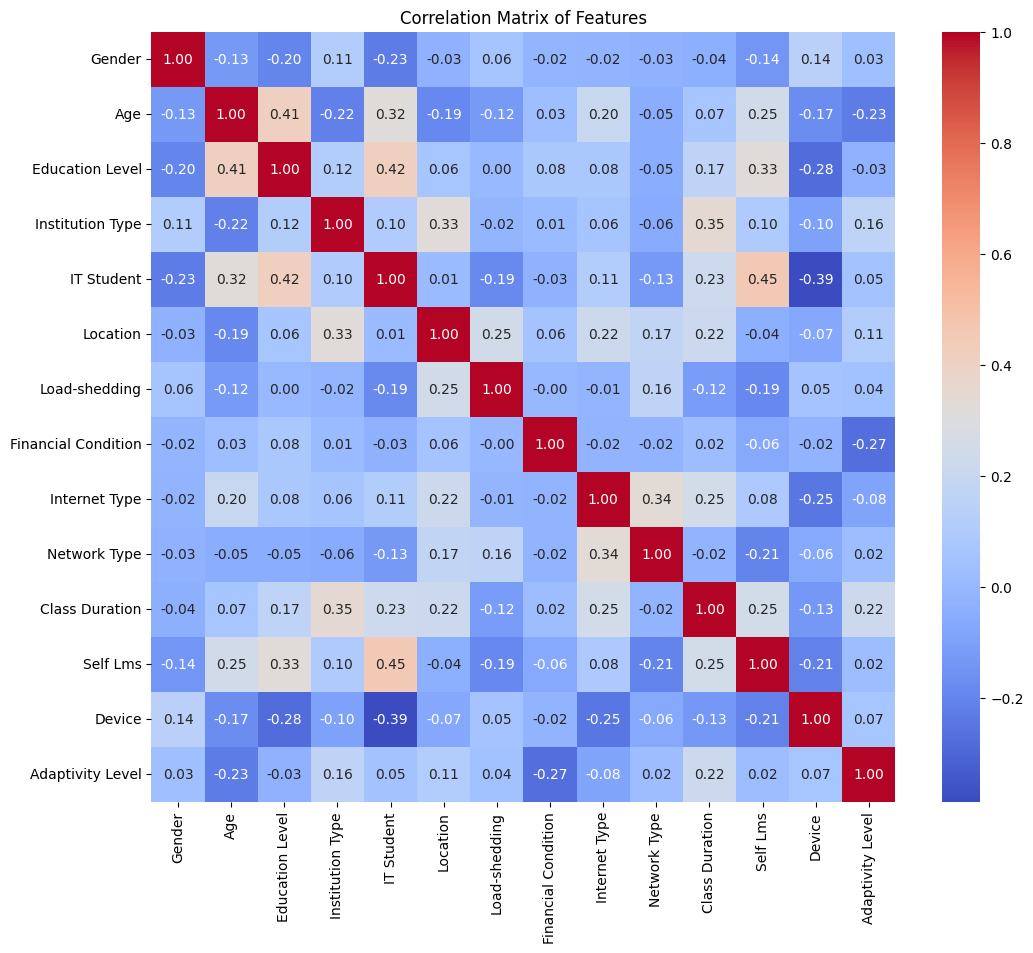

In [396]:
#Compute the numerical correlations between data fields in pairs.
correlation_matrix = dfrm.corr()

#Start drawing the canvas using the specified width and height.
mpt.figure(figsize=(12, 10))

#Generate a colored grid that displays values and their numerical connections.
sbs.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#Include a header for the entire graphical depiction.
mpt.title('Correlation Matrix of Features')

#Show the finished graphic result on the screen.
mpt.show()


#Numerical features correlation with target variable


In [397]:
#Extract from the dataset any features that have numerical values.
numerical_features = dfrm.select_dtypes(include=['number'])

#Organize the data from strongest to weakest by measuring the relationship between each numerical feature and the prediction target.
correlation_with_target = numerical_features.corr()['Adaptivity Level'].sort_values(ascending=False)

#Show the determined connections to the prediction objective.
print("Correlation with Adaptivity Level:\n", correlation_with_target)

Correlation with Adaptivity Level:
 Adaptivity Level       1.000000
Class Duration         0.222075
Institution Type       0.162387
Location               0.107414
Device                 0.065729
IT Student             0.049282
Load-shedding          0.043611
Gender                 0.033426
Self Lms               0.022179
Network Type           0.021647
Education Level       -0.032694
Internet Type         -0.084276
Age                   -0.230317
Financial Condition   -0.274643
Name: Adaptivity Level, dtype: float64


#Feature Selection

In [398]:
# Distinguishing the target variable from the independent variables (features)
X = dfrm.drop('Adaptivity Level', axis=1)

# The target variable is stored in 'y'
y = dfrm['Adaptivity Level']

# Using the chi-squared (chi2) statistical test to choose the top ten best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

# Adapting the data to the SelectKBest technique
fit = bestfeatures.fit(X,y)

#Building a DataFrame to hold each feature's ratings
dfscores = pds.DataFrame(fit.scores_)

# Putting the feature names into a DataFrame
dfcolumns = pds.DataFrame(X.columns)

# Creating a single DataFrame by combining the feature names and scores
featureScores = pds.concat([dfcolumns, dfscores], axis=1)

# Renaming the merged DataFrame's columns
featureScores.columns = ['Specs', 'Score']

# Presenting the top ten attributes with the highest ratings
print(featureScores.nlargest(10, 'Score'))


                  Specs       Score
7   Financial Condition  167.249593
10       Class Duration   48.297840
1                   Age   45.086576
3      Institution Type   33.954711
11             Self Lms   24.388184
5              Location   18.442847
4            IT Student   14.653067
8         Internet Type   12.132643
2       Education Level    8.660169
0                Gender    7.401038


#  Apply Feature Scaling

In [399]:
# Get the selected feature names from 'featureScores' DataFrame
selected_features = featureScores['Specs'].values

# Select only the chosen features from the original DataFrame 'dfrm'
X_selected = dfrm[selected_features]

# Apply MinMaxScaler on the selected numerical features data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

# Class Distribution of Adaptivity Level

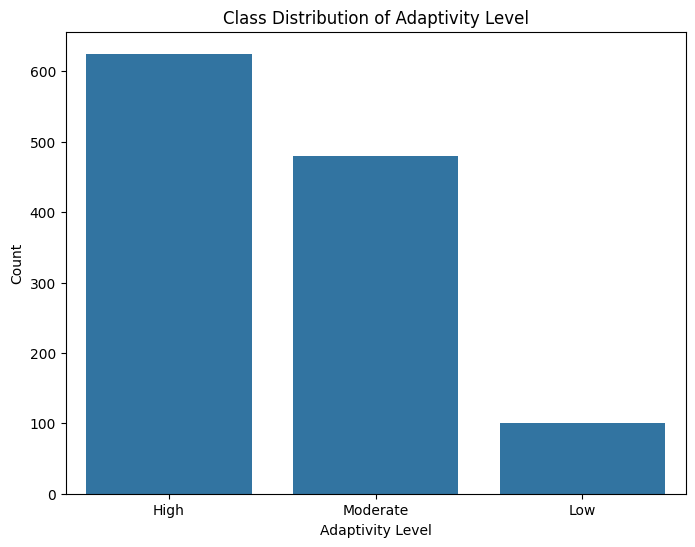

In [440]:
# Establish the plot canvas's dimensions.
mpt.figure(figsize=(8, 6))

# Create a bar chart to display the target classes' frequency.
sbs.countplot(x='Adaptivity Level', data=dfrm)

# Assuming 'dfrm' is your DataFrame and 'Adaptivity Level' column contains 0, 1, 2
dfrm['Adaptivity Level'] = dfrm['Adaptivity Level'].replace({0: 'Low', 1: 'Moderate', 2: 'High'})

#Assign a label to the chart's header.
mpt.title('Class Distribution of Adaptivity Level')

# Indicate the category type by labeling the horizontal axis.
mpt.xlabel('Adaptivity Level')

#To indicate amount, label the vertical axis.
mpt.ylabel('Count')

#Display the finished product on the screen.
mpt.show()


# Data Balancing

In [401]:
# Start the process of reproducing underrepresented entries.
oversampler = RandomOverSampler(random_state=42)

# Use input and output methods to ensure category balance.
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)


# Create a new balanced DataFrame


In [402]:
#Uses modified feature values to create a structured table.
dfrm_resampled = pds.DataFrame(X_resampled, columns=X.columns)

#Adds to the structured data the desired categorization.
dfrm_resampled['Adaptivity Level'] = y_resampled


#Class Distribution After Random Oversampling

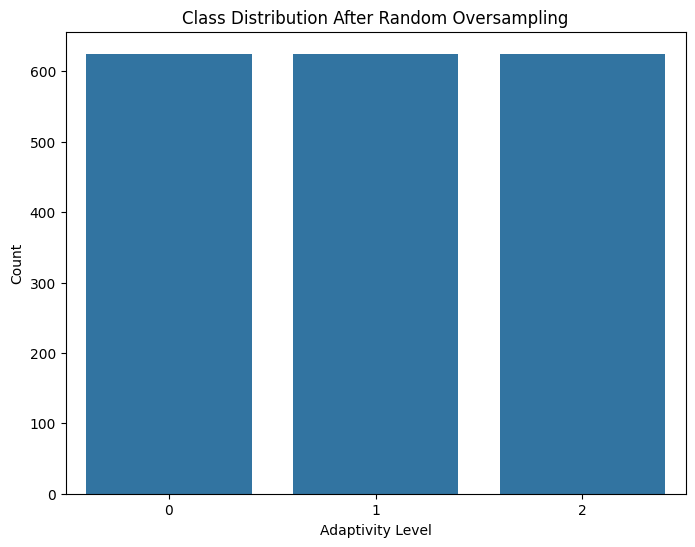

In [445]:
mpt.figure(figsize=(8, 6))

#Plot the updated dataset's occurrences by group in a bar chart.
sbs.countplot(x='Adaptivity Level', data=dfrm_resampled)


#Assign the visualization's heading
mpt.title('Class Distribution After Random Oversampling')

# Properly label the horizontal axis.
mpt.xlabel('Adaptivity Level')

# Indicate the frequency by labeling the vertical axis.
mpt.ylabel('Count')

#Display the finished chart.
mpt.show()

#Data spliting

In [404]:
#Creating subsets from the modified data to train the model and verify its accuracy
X_tran, X_tst, y_tran, y_tst = train_test_split(X_resampled, y_resampled, test_size=0.2,  random_state=42)

# Model Training

# Apply Stacking Classifier Model

In [405]:
# Establishing a set of foundational machine learning models and their corresponding hyperparameters for stacking
estimators = [

# Model for gradient boosting with certain parameters
    ('gbc', GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=10, subsample=0.8, random_state=32)),

# Support vector classifier with particular kernel and regularization parameters
    ('svc', SVC(probability=True, kernel='rbf', C=2.0, gamma='scale')),

# XGBoost classifier with particular learning and boosting settings
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, subsample=0.8,
                          use_label_encoder=False, eval_metric='mlogloss', random_state=30)),

 # Boosting settings for the LightGBM classifier
    ('lgbm', LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, subsample=0.8, random_state=32))
]


# Specifying the final estimator to integrate the basic models' predictions
final_estimator = LogisticRegressionCV(Cs=[0.1, 5.0, 10.0], cv=10)


# Setting up the StackingClassifier with the final estimator and base models
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

# Using the training data to fit the stacking model
clf.fit(X_tran, y_tran)

# Fitting the stacking model with the training data
y_pred = clf.predict(X_tst)


In [406]:
# Forecasting training data results
y_tran_pred = clf.predict(X_tran)

# Forecasting test data results
y_tst_pred = clf.predict(X_tst)

# Training results of Stacking Classifier Model

In [407]:
# Indicates the proportion of accurate forecasts.
tran_accuracy = accuracy_score(y_tran, y_tran_pred)

# Determines the accuracy and recall weighted harmonic mean.
f1_tran = f1_score(y_tran, y_tran_pred, average='weighted')

# Calculates the model's capacity to accurately detect affirmative instances
precision_tran = precision_score(y_tran, y_tran_pred, average='weighted')

# Evaluates the model's capacity to include all pertinent positive examples.
recall_tran = recall_score(y_tran, y_tran_pred, average='weighted')

# Provides the total accuracy score.
print(f"Training Accuracy: {tran_accuracy}")

# Shows the F1 score, taking recall and accuracy into account.
print(f"Training F1 Score: {f1_tran}")

# Illustrates how accurate the predictions were using the training data.
print(f"Training Precision Score: {precision_tran}")

# Provides the recall value, which shows how sensitive the model is.
print(f"Training Recall Score: {recall_tran}")

Training Accuracy: 0.9366666666666666
Training F1 Score: 0.9359310189470461
Training Precision Score: 0.9388696338875848
Training Recall Score: 0.9366666666666666


# Classification Report of Stacking Classifier Model

In [408]:
# Shows the model predictions' performance measures.
print(classification_report(y_tran, y_tran_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       496
           1       0.94      0.95      0.95       495
           2       0.97      0.86      0.91       509

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



#Confusion Matrix of Stacking Classifier Model


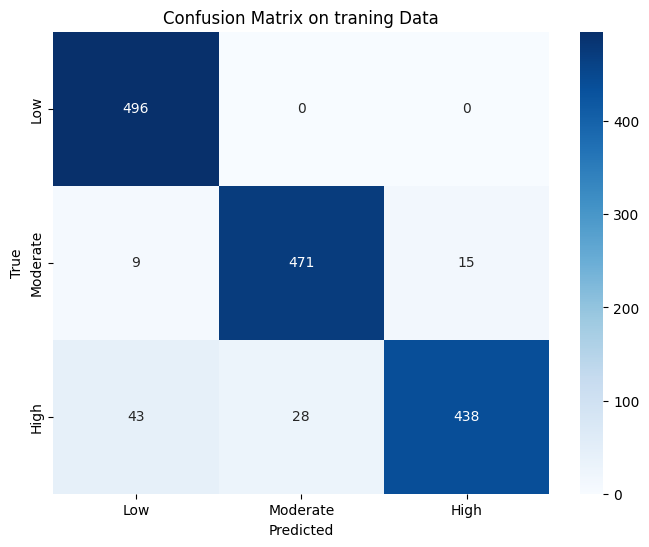

In [409]:
# Confusion matrix calculation using actual and expected values
cm = confusion_matrix(y_tran, y_tran_pred)

# Determining the heatmap's figure size
mpt.figure(figsize=(8, 6))

# Creating a heatmap plot with color scheme and annotations
sbs.heatmap(cm, annot=True, fmt='d', cmap='Blues',

# Assigning expected values to the x-axis
            xticklabels=['Low', 'Moderate', 'High'],

# Labeling the true values on the y-axis
            yticklabels=['Low', 'Moderate', 'High'])

# The x-axis label
mpt.xlabel('Predicted')

# The y-axis label
mpt.ylabel('True')

# Giving the story a title
mpt.title('Confusion Matrix on traning Data')

# Presenting the matrix plot of misunderstanding
mpt.show()


# RoC Curve of Stacking Classifier Model

In [410]:
#Generates a one-hot encoded structure from actual labels.
y_tst_bin = label_binarize(y_tst, classes=[0, 1, 2])

#After transformation, the total number of target groupings is extracted.
n_classes = y_tst_bin.shape[1]

In [411]:
#Set up the framework to hold horizontal values for examination.
fpr = dict()

#Set up the structure to gather vertical points for the purpose of plotting curves.
tpr = dict()

#Set up storage for the outcomes of performance reviews.
roc_auc = dict()

#Repeat each outcome label for a personal evaluation.
for i in range(n_classes):

#Extract curve coordinates from expected confidence and true labels.
    fpr[i], tpr[i], _ = roc_curve(y_tst_bin[:, i], clf.predict_proba(X_tst)[:, i])

#Find the current label's contained area under the curve.
    roc_auc[i] = auc(fpr[i], tpr[i])

#Produce a comprehensive performance trajectory for every instance.
fpr["micro"], tpr["micro"], _ = roc_curve(y_tst_bin.ravel(), clf.predict_proba(X_tst).ravel())

#Identify the aggregate assessment metric for every category.
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


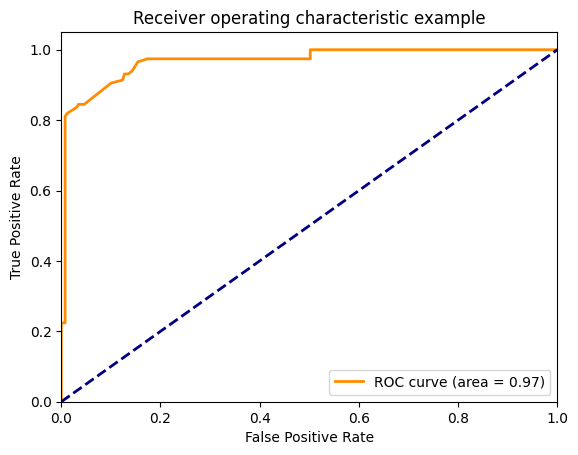

In [412]:
#Starts a blank figure canvas for the purpose of charting
mpt.figure()

#Defines the graphical elements' thickness
lw = 2

#Draws the main performance curve using specific metrics
mpt.plot(fpr[2], tpr[2], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

#Incorporates a comparative reference diagonal
mpt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Defines the bounds of the horizontal axis
mpt.xlim([0.0, 1.0])

# Defines the bounds of the vertical axis
mpt.ylim([0.0, 1.05])

# Indicates the error type by labeling the horizontal axis
mpt.xlabel('False Positive Rate')

#Indicates precision by labeling the vertical axis
mpt.ylabel('True Positive Rate')

# Provides the graph with a heading.
mpt.title('Receiver operating characteristic example')

#A label box appears in the lower-right corner.
mpt.legend(loc="lower right")

#Displays the visual representation on the screen.
mpt.show()


#Testing result of Stacking Classifier Model

In [413]:
#Determine performance metrics using assessment data.
tst_accuracy = accuracy_score(y_tst, y_tst_pred)

#Calculate the precision and recall harmonic mean.
f1_tst = f1_score(y_tst, y_tst_pred, average='macro')

#Calculate the proportion of positive observations that were accurately predicted.
precision_tst = precision_score(y_tst, y_tst_pred, average='macro')

#Determine the percentage of pertinent cases that were retrieved.
recall_tst = recall_score(y_tst, y_tst_pred, average='macro')

#Show the results of the model evaluation.
print(f"Testing Accuracy: {tst_accuracy}")

#Display equilibrium between sensitivity and accuracy.
print(f"Testing F1 Score: {f1_tst}")

#Output positive prediction correctness
print(f"Testing Precision Score: {precision_tst}")

#Print the true positive rate.
print(f"Testing Recall Score: {recall_tst}")

Testing Accuracy: 0.9226666666666666
Testing F1 Score: 0.9200081788317083
Testing Precision Score: 0.9229785663234451
Testing Recall Score: 0.919761273209549


# Classification Report of Stacking Classifier Model

In [414]:
#Compute a summary of the expected outcomes' accuracy, recall, precision, and f1-score.
print(classification_report(y_tst, y_tst_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96       129
           1       0.93      0.92      0.93       130
           2       0.92      0.84      0.88       116

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



#Confusion matrix of Stacking Classifier Model

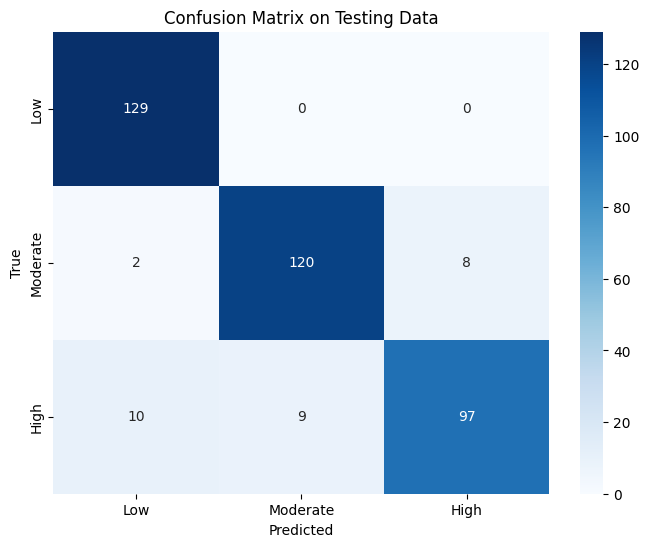

In [415]:
#Generates a summary table comparing estimated and genuine outcomes.
cm = confusion_matrix(y_tst, y_tst_pred)

# Defines the size of the output display.
mpt.figure(figsize=(8, 6))

#Generates a visual table with color gradient and count labels
sbs.heatmap(cm, annot=True, fmt='d', cmap='Blues',

#Labels categories on the bottom row
            xticklabels=['Low', 'Moderate', 'High'],

#Labels categories in the left column
            yticklabels=['Low', 'Moderate', 'High'])

#Label is set beneath the horizontal axis.
mpt.xlabel('Predicted')

#Adds a label next to the vertical axis
mpt.ylabel('True')

#Increases the plot's descriptive heading
mpt.title('Confusion Matrix on Testing Data')

#Displays the finished chart to the audience.
mpt.show()

# RoC Curve of Stacking Classifier Model

In [416]:
#Converts true labels into binary so that they can be used with ROC calculations.
y_tst_bin = label_binarize(y_tst, classes=[0, 1, 2])

#Determines the number of different output categories that exist.
n_classes = y_tst_bin.shape[1]


In [417]:
#Sets up storage for all labels' false alarm rates.
fpr = dict()

#Sets up storage for all labels' hit rates.
tpr = dict()

#Sets up storage for the ROC curve's performance score
rc_auc = dict()

#Produces estimations of probability for the input examples
y_score = clf.predict_proba(X_tst)

In [418]:
#Ropes through every classification task category.
for i in range(n_classes):

# Determines ROC spots on the x and y axes.
    fpr[i], tpr[i], _ = roc_curve(y_tst_bin[:, i], y_score[:, i])

# Determines each label's area under the ROC curve.
    rc_auc[i] = auc(fpr[i], tpr[i])

#The task is treated as binary in order to compute the combined ROC.
fpr["micro"], tpr["micro"], _ = roc_curve(y_tst_bin.ravel(), y_score.ravel())

#Computes the total ROC area for every label in a single task.
rc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


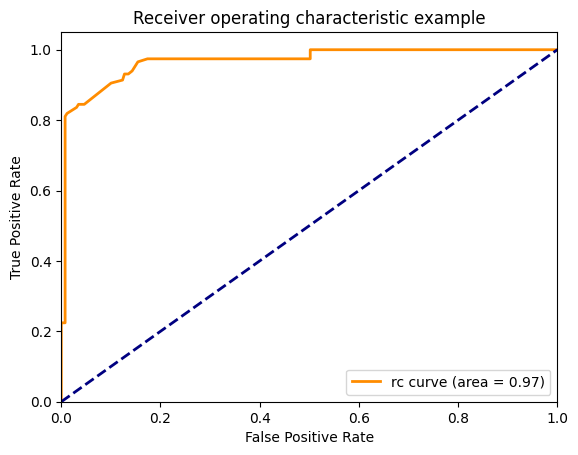

In [419]:
#Starts a blank visual storyline
mpt.figure()

#Defines the graph's line thickness
lw = 2

#Plots one of the output categories' ROC curves.
mpt.plot(fpr[2], tpr[2], color='darkorange',

# Indicates the area value of the ROC curve.
         lw=lw, label='rc curve (area = %0.2f)' % rc_auc[2])

# Creates a baseline reference for the classifier that requires no skill.
mpt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#Defines horizontal boundaries to improve visualization
mpt.xlim([0.0, 1.0])

#To prevent clipping, set vertical boundaries just a bit outside range.
mpt.ylim([0.0, 1.05])

# Indicates inaccurate positive detections by labeling the x-axis.
mpt.xlabel('False Positive Rate')

#Indicates successful affirmative detections by labeling the y-axis.
mpt.ylabel('True Positive Rate')

#Titles the story for purpose clarity
mpt.title('Receiver operating characteristic example')

#Places legend explaining the bottom-right curve
mpt.legend(loc="lower right")

# Shows the user the completed ROC plot.
mpt.show()

# Apply ExtraTreeClassifier Model

In [420]:
#Building a tree-based ensemble with repeatability and fixed depth
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=40,max_depth=10)

#Using sample data to modify the model
extra_trees_clf.fit(X_tran, y_tran)

ExtraTreesClassifier(max_depth=10, random_state=40)

In [421]:
#Creating output labels for data that has been fitted
y_tran_pred = extra_trees_clf.predict(X_tran)

#Approximating model results for data that is not visible
y_tst_pred = extra_trees_clf.predict(X_tst)




# Training results of ExtraTreeClassifier Model


In [422]:
#Using actual and expected values to calculate the accuracy metric
tran_accuracy_ex = accuracy_score(y_tran, y_tran_pred)

#Determining fit predictions by calculating the weighted average of the harmonic mean
f1_tran_ex = f1_score(y_tran, y_tran_pred, average='macro')

#Determining the proportion of actual hits to anticipated positive instances
precision_tran_ex = precision_score(y_tran, y_tran_pred, average='macro')

#Evaluating how many relevant items are correctly retrieved
recall_tran_ex = recall_score(y_tran, y_tran_pred, average='macro')

#Displaying fit accuracy value
print(f"Training Accuracy: {tran_accuracy_ex}")

#Producing the fitted set's calculated f1 metric
print(f"Training F1 Score: {f1_tran_ex}")

#Printing the positive prediction accuracy weighted average
print(f"Training Precision Score: {precision_tran_ex}")

#Showing the training data's successful retrieval rate
print(f"Training Recall Score: {recall_tran_ex}")

Training Accuracy: 0.9366666666666666
Training F1 Score: 0.9361601993947793
Training Precision Score: 0.9386282272735801
Training Recall Score: 0.9373419856720447


# Classification report of ExtraTreeClassifier Model

In [423]:
#Providing a summary of training results for clasification
print(classification_report(y_tran, y_tran_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       496
           1       0.94      0.95      0.95       495
           2       0.97      0.86      0.91       509

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



# Confusion Matrix of ExtraTreeClassifier Model

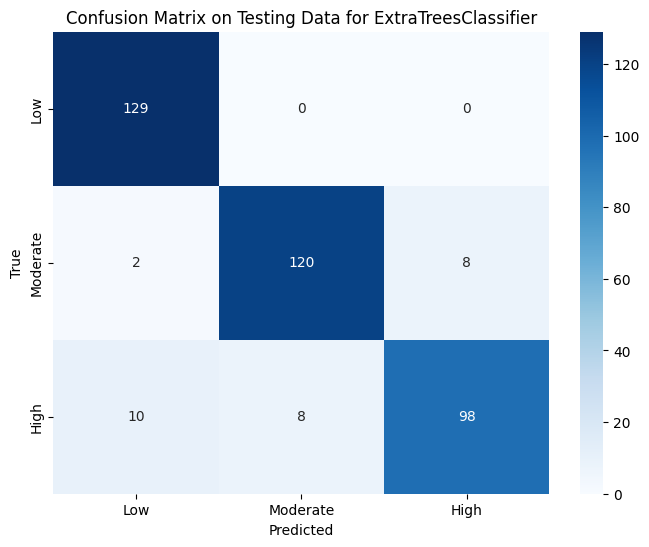

In [424]:
#Computing the test set's misclassification summary
cm = confusion_matrix(y_tst, y_tst_pred)

#Determining the proportions of the figure for clarity
mpt.figure(figsize=(8, 6))

#Building a color-coded classification mismatch grid
sbs.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])

#Identifying the heatmap's horizontal axis
mpt.xlabel('Predicted')

#Configuring the ground truth vertical axis text
mpt.ylabel('True')

#Titling the summary of visual misclassification
mpt.title('Confusion Matrix on Testing Data for ExtraTreesClassifier')

#Showing the plotted output of confused
mpt.show()


# RoC Curve of ExtraTreeClassifier Model

In [425]:
#Transforming target classes for training into multi-hot format
y_tran_bin = label_binarize(y_tran, classes=[0, 1, 2])

#Determining how many output categories there are
n_classes = y_tran_bin.shape[1]

#Building performance curve value containers
fpr = dict()
tpr = dict()
rc_auc = dict()

#Creating ROC curve data for every training category
for i in range(n_classes):

# Use the ROC curve to determine the class I False Positive Rate and True Positive Rate.
    fpr[i], tpr[i], _ = roc_curve(y_tran_bin[:, i], clf.predict_proba(X_tran)[:, i])

# Determine the Area  Using the previously determined fpr and tpr, the class I ROC Curv.
    rc_auc[i] = auc(fpr[i], tpr[i])

#Combining the details of the overall ROC curve across labels
fpr["micro"], tpr["micro"], _ = roc_curve(y_tran_bin.ravel(), clf.predict_proba(X_tran).ravel())

# Calculating the combined ROC curve's area under
rc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

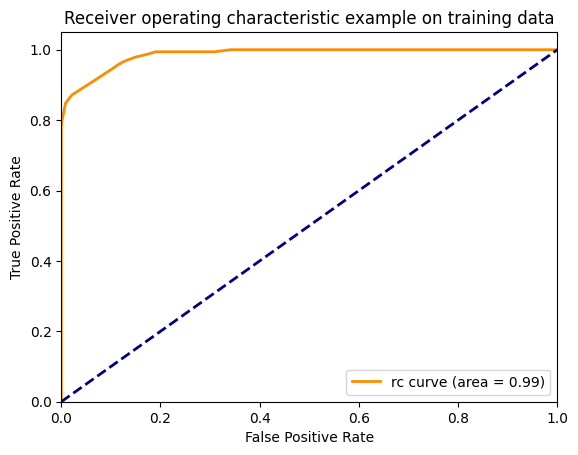

In [426]:
#Starting the drawing canvas
mpt.figure()

#Determining graph line width
lw = 2

#Creating a  curv for a particular group
mpt.plot(fpr[2], tpr[2], color='darkorange',lw=lw, label='rc curve (area = %0.2f)' % rc_auc[2])

#Diagonal plotting for the reference baseline
mpt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#Setting horizontal boundaries
mpt.xlim([0.0, 1.0])

#Resolving the visualization's vertical range
mpt.ylim([0.0, 1.05])

# Including text on the x-axis
mpt.xlabel('False Positive Rate')

#Adding genuine positive information to the y-axis label
mpt.ylabel('True Positive Rate')

#Determining the ROC graph's overall title
mpt.title('Receiver operating characteristic example on training data')

#Graph key displayed in lower-right corner
mpt.legend(loc="lower right")

#Assembling the graph
mpt.show()

# Testing result of ExtraTreeClassifier Model


In [427]:
#Finding accuracy for new input samples
tst_accuracy_tr = accuracy_score(y_tst, y_tst_pred)

#Predictive weighted harmonic mean calculation
f1_tst_tr = f1_score(y_tst, y_tst_pred, average='weighted')

#Determining whether projected cases are accurate
precision_tst_tr = precision_score(y_tst, y_tst_pred, average='weighted')

#Determining the proportion of accurate hits among real-world instances
recall_tst_tr = recall_score(y_tst, y_tst_pred, average='weighted')

#Printing the correctness ratio on samples that aren't visible
print(f"Testing Accuracy: {tst_accuracy_tr}")

#Achieving balanced results on tst forecasts
print(f"Testing F1 Score: {f1_tst_tr}")

#Showing the test set hit accuracy
print(f"Testing Precision Score: {precision_tst_tr}")

#Recall score output for evaluation that is not visible
print(f"Testing Recall Score: {recall_tst_tr}")

Testing Accuracy: 0.9253333333333333
Testing F1 Score: 0.9242968363712549
Testing Precision Score: 0.9257108256389668
Testing Recall Score: 0.9253333333333333


# Classification Report of ExtraTreeClassifier Model

In [428]:
#Listing test precision and recall by class
print(classification_report(y_tst, y_tst_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       129
           1       0.94      0.92      0.93       130
           2       0.92      0.84      0.88       116

    accuracy                           0.93       375
   macro avg       0.93      0.92      0.92       375
weighted avg       0.93      0.93      0.92       375



# Confusion matrix of ExtraTreeClassifier Model


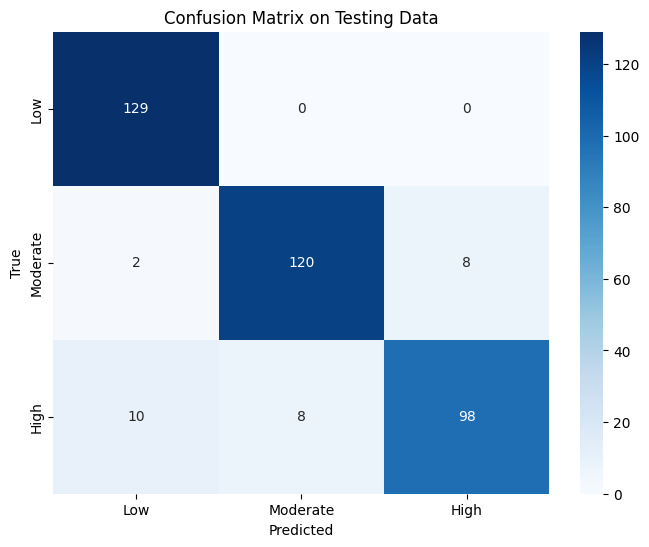

In [429]:
#Recalculating the confusion grid for the output of the test
cm = confusion_matrix(y_tst, y_tst_pred)

#Starting a new story about misunderstanding
mpt.figure(figsize=(8, 6))

#Building an intricate matrix heatmap
sbs.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])

#Labeling the anticipated categories
mpt.xlabel('Predicted')

#Putting a label on the real categories
mpt.ylabel('True')

#Graph title for showing of evaluation mismatch
mpt.title('Confusion Matrix on Testing Data')

#Display the grid of confusion
mpt.show()

# RoC Curve of ExtraTreeClassifier Model

In [430]:
#Converting binary vectors from test labels
y_tst_bin = label_binarize(y_tst, classes=[0, 1, 2])

#Determining the output label space's size
n_classes = y_tst_bin.shape[1]

#Setting up placeholders for the ROC computation
fpr = dict()

# Construct a container to store a single type of assessment result for several classes.
tpr = dict()

# Set up the storage for the curve-based performance ratings.
rc_auc = dict()

#Determining test case prediction scores
y_score = extra_trees_clf.predict_proba(X_tst)

#Getting each output group's performance statistics
for i in range(n_classes):

#Extracts evaluation values by contrasting predictions with actuals.
    fpr[i], tpr[i], _ = roc_curve(y_tst_bin[:, i], y_score[:, i])

#Computes area beneath the line for results visualization
    rc_auc[i] = auc(fpr[i], tpr[i])

#Determining the total ROC metrics
fpr["micro"], tpr["micro"], _ = roc_curve(y_tst_bin.ravel(), y_score.ravel())

#Combining the ROC area
rc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

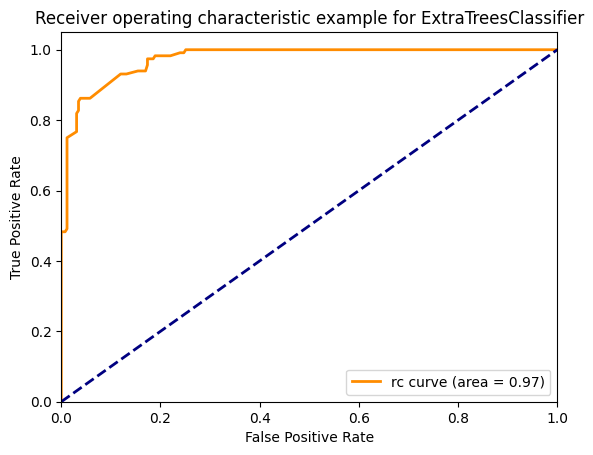

In [431]:
#Starting the ROC test plot
mpt.figure()

#Determining line thickness for aesthetics
lw = 2

#For one of the label categories, the ROC plot
mpt.plot(fpr[2], tpr[2], color='darkorange',lw=lw, label='rc curve (area = %0.2f)' % rc_auc[2])

#Drawing a reference diagonal
mpt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#Depicting a diagonal reference
mpt.xlim([0.0, 1.0])

#Setting borders for horizontal graphs
mpt.ylim([0.0, 1.05])

#Resolving the range of vertical graphs
mpt.xlabel('False Positive Rate')

#Axis for real positives
mpt.ylabel('True Positive Rate')

#ROC representation graph title
mpt.title('Receiver operating characteristic example for ExtraTreesClassifier')

#Including a curve legend in the corner
mpt.legend(loc="lower right")

# Presenting the ROC outcome
mpt.show()

# Comparison Graph of ExtraTreeClassifier Model and StackingClassifier Model

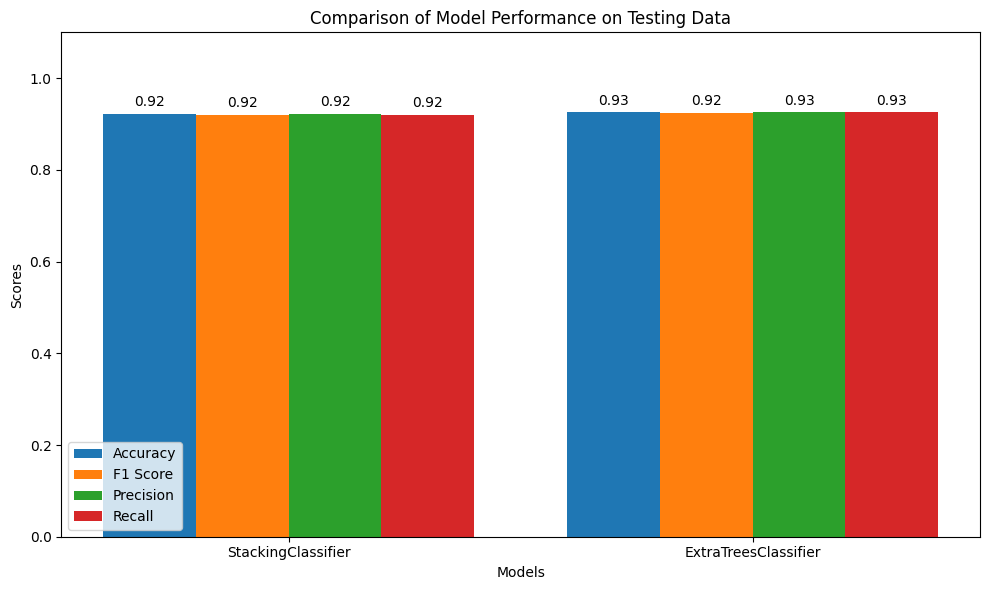

In [432]:
#Listing performance plot model identifiers
model_names = ['StackingClassifier', 'ExtraTreesClassifier']

#Computing accuracy values
accuracy_scores = [tst_accuracy, tst_accuracy_tr]

#Compiling Formula One scores for charting
f1_scores = [f1_tst, f1_tst_tr]

#Getting data to improve prediction accuracy
precision_scores = [precision_tst, precision_tst_tr]

#Getting visual recall data ready
recall_scores = [recall_tst, recall_tst_tr]

#Each bar segment's width in the grouped chart
bar_width = 0.2

#Indexing the positions of bars
index = range(len(model_names))

#Building the grouped chart's plotting area
fig, ax = mpt.subplots(figsize=(10, 6))

#The first bar of metrics for every model
rects1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy')

#Offset to the right is the second metric bar.
rects2 = ax.bar([i + bar_width for i in index], f1_scores, bar_width, label='F1 Score')

#The third metric bar is positioned more to the right.
rects3 = ax.bar([i + 2 * bar_width for i in index], precision_scores, bar_width, label='Precision')

#The recall value's fourth metric bar
rects4 = ax.bar([i + 3 * bar_width for i in index], recall_scores, bar_width, label='Recall')

#A feature for adding values to bars
def add_labels(rects):

#Goes through every visual component that represents a value.
    for rect in rects:

#Gets the current element's vertical size
        height = rect.get_height()

#Slightly above each element, a rounded number is displayed.
        ax.text(rect.get_x() + rect.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

#Labeling the initial metric bars
add_labels(rects1)

#Adding annotations to the second metric bars
add_labels(rects2)

#The third metric bars are annotated.
add_labels(rects3)

#Text placement above the last bars
add_labels(rects4)

#Category axis label
ax.set_xlabel('Models')

#Name of the vertical axis for all metrics
ax.set_ylabel('Scores')

#The performance chart's primary title
ax.set_title('Comparison of Model Performance on Testing Data')

# Accurately positioning the x-axis ticks
ax.set_xticks([i + 1.5 * bar_width for i in index])

#Granting x-axis ticks names
ax.set_xticklabels(model_names)

#Including a storyline legend to make things more clear
ax.legend()

#Setting the value scale's upper limit
mpt.ylim(0, 1.1)

#Completing the layout to prevent overlap
mpt.tight_layout()

#The grouped bar chart is being rendered.
mpt.show()


 98%|===================| 1108/1125 [00:31<00:00]       

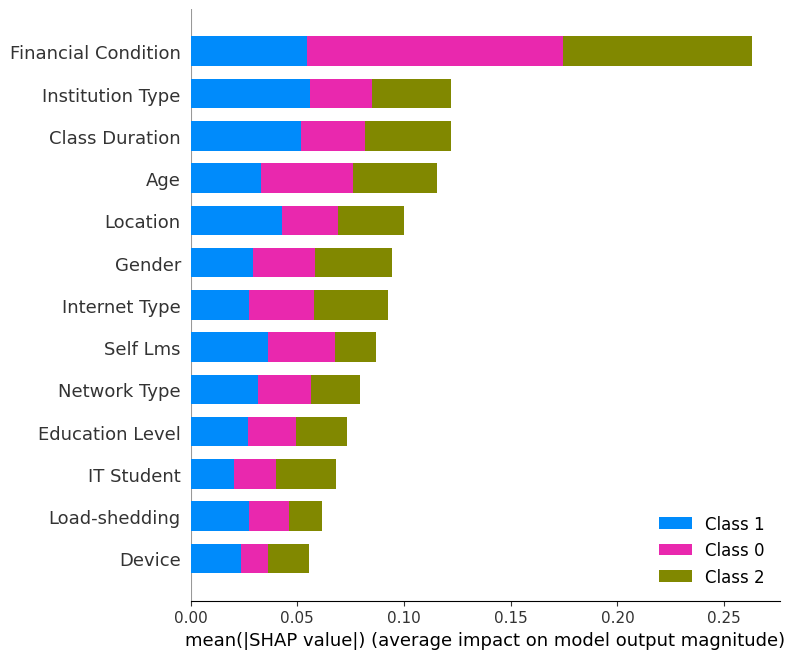

In [436]:
# Use the training data and the trained Extra Trees classifier to initialize the SHAP explainer.
explainer = shap.Explainer(extra_trees_clf, X_tran)

# To explain predictions, generate SHAAP valus for the test dataset.
shap_values = explainer(X_tst)

# Using test data and the original feature names, make a SHAAP summary plt.
shap.summary_plot(shap_values, X_tst, feature_names=X.columns)

# Show the SHAP plot.
plt.show()


In [435]:
# Use the training data to create a LimeTabularExplainer object.
explainer = lime.lime_tabular.LimeTabularExplainer(

# Send the training dataset.
    training_data=X_tran,

# Give a list of feature names.
    feature_names=X.columns.tolist(),

# Define the names of the target classes.
    class_names=['Low', 'Moderate', 'High'],

# Allow continuous features to be discretized.
    discretize_continuous=True
)

# Choose the test instance's index to provide an explanation.
instance_index = 0

# Use the chosen index to retrieve the test instance.
instance = pds.DataFrame(X_tst).iloc[instance_index]

# Use the trained classifier to produce an explanation for the chosen instance.
exp = explainer.explain_instance(

# Provide a NumPy array containing the instance data.
    data_row=instance.values,

# Apply the probability prediction function of the classifier.
    predict_fn=extra_trees_clf.predict_proba,

# Indicate how many features the explanation should contain.
    num_features=len(X.columns),

# Ask for an explanation of the top three anticipated classes.
    top_labels=3
)

# Use a table format to display the explanation output in the notebook.
exp.show_in_notebook(show_table=True)

